In [28]:
suppressPackageStartupMessages(library(readxl))
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(patchwork))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(stringr))
library(hise)
library(plyr)
library(purrr)
library(vegan)
#library(arrow)
library(parallel)
library(ComplexHeatmap)
library(ggsci)
library(tidyverse)
library(rstatix)
library(ggpubr)


Attaching package: ‘ggpubr’


The following object is masked from ‘package:plyr’:

    mutate




In [2]:
female_br1<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/Mean_gene_expression_IL1B+_CD14_mono/IL1B_CD14mon_Female_BR1_mean_gene_X_v2.csv")

In [3]:
female_br2<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/Mean_gene_expression_IL1B+_CD14_mono/IL1B_CD14mon_Female_BR2_mean_gene_X_v2.csv")

In [4]:
male_br1<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/Mean_gene_expression_IL1B+_CD14_mono/IL1B_CD14mon_Male_BR1_mean_gene_X_v2.csv")

In [5]:
male_br2<-read.csv("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/Mean_gene_expression_IL1B+_CD14_mono/IL1B_CD14mon_Male_BR2_mean_gene_X_v2.csv")

In [6]:
# Combine data frames vertically
combined_df <- rbind(female_br1, female_br2, male_br1, male_br2 )

In [7]:
head(combined_df)

,RBP7,FCGR3A,PTGS2,G0S2,NLRP3,IL1B,CCR1,BCL6,CXCL8,RASGEF1B,⋯,sample.diseaseStatesRecordedAtVisit,Sample_ID,Sample_Draw_date,Covid_Dose_1,Covid_Dose_2,Covid_exlcusion,CMV.IgG.Serology.Result.Interpretation,BMI,file.name.downloaded,file.path
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,-0.37650294,-0.04166035,-0.17267644,-0.16980010,-0.4028474,-0.31459817,0.13134994,-0.09538612,-0.05435196,0.1167381,⋯,NA,NA,2019-10-15,NA,NA,no,Negative,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5
2,0.05863396,-0.36055708,-0.51247644,-0.55464202,0.1078057,-0.31105860,0.20368055,-0.40638971,-0.08215689,-0.1251711,⋯,NA,NA,2019-10-15,2020-12-28,2021-01-16,no,Negative,<25-BMI,B001-P1_PB00003-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/40efd03a-cb2f-4677-af42-a056cbfe5a17/B001-P1_PB00003-01_labeled.h5
3,-0.22565323,0.43133490,-0.24004810,-0.48980641,-0.1022985,0.45525462,0.09143701,-0.05397158,-0.26689697,-0.1193962,⋯,NA,NA,2019-10-23,2021-01-16,2021-02-26,no,Negative,<25-BMI,B002-P1_PB00006-01_2023-11-17T21:36:51.794326181Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/ea8d98e9-e99e-4dc6-9e78-9866e0deac68/B002-P1_PB00006-01_2023-11-17T21:36:51.794326181Z_labeled.h5
4,0.46330244,0.18750536,-0.07894074,0.04719155,0.4448663,-0.18129745,-0.64486871,-0.61931956,0.55121021,0.2370426,⋯,NA,NA,2019-10-29,NA,NA,no,Positive,>30BMI,B002-P1_PB00012-01_2023-11-17T21:36:51.794326181Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/7a99c4c8-5438-430a-a37a-5b5f4052c064/B002-P1_PB00012-01_2023-11-17T21:36:51.794326181Z_labeled.h5
5,-0.01591667,0.53087043,-0.28207378,0.42437277,0.3586200,0.05055987,-0.67315360,0.22436389,-0.36966370,0.0173513,⋯,NA,NA,2019-11-13,2021-03-18,2021-04-15,no,Positive,<25-BMI,B002-P2_PB00022-01_2023-11-17T21:38:04.103392546Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/9114124c-af57-47a7-bde3-ade4a150ac82/B002-P2_PB00022-01_2023-11-17T21:38:04.103392546Z_labeled.h5
6,1.06868514,-0.36055708,-0.65015286,1.01280771,-0.7497613,-0.03845122,-0.89141673,-0.61931956,-0.86100018,-0.6195420,⋯,NA,NA,2019-11-19,2021-04-04,2021-04-26,no,Negative,<25-BMI,B078-P2_PB00023-05_2021-08-19T17:09:29.934849811Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/9d5d8b77-6fb9-4f6c-8f0f-a24d87968962/B078-P2_PB00023-05_2021-08-19T17:09:29.934849811Z_labeled.h5


In [8]:
#create new columns
# Using paste()
combined_df$facet <- paste(combined_df$subject.biologicalSex, combined_df$cohort.cohortGuid, sep = "_")

In [9]:
unique(combined_df$facet)

[1] "Female_BR1" "Female_BR2" "Male_BR1"   "Male_BR2"

In [10]:
head(combined_df)

,RBP7,FCGR3A,PTGS2,G0S2,NLRP3,IL1B,CCR1,BCL6,CXCL8,RASGEF1B,⋯,Sample_ID,Sample_Draw_date,Covid_Dose_1,Covid_Dose_2,Covid_exlcusion,CMV.IgG.Serology.Result.Interpretation,BMI,file.name.downloaded,file.path,facet
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<lgl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,-0.37650294,-0.04166035,-0.17267644,-0.16980010,-0.4028474,-0.31459817,0.13134994,-0.09538612,-0.05435196,0.1167381,⋯,NA,2019-10-15,NA,NA,no,Negative,<25-BMI,B001-P1_PB00001-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/fec489f9-9a74-4635-aa91-d2bf09d1faec/B001-P1_PB00001-01_labeled.h5,Female_BR1
2,0.05863396,-0.36055708,-0.51247644,-0.55464202,0.1078057,-0.31105860,0.20368055,-0.40638971,-0.08215689,-0.1251711,⋯,NA,2019-10-15,2020-12-28,2021-01-16,no,Negative,<25-BMI,B001-P1_PB00003-01_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/40efd03a-cb2f-4677-af42-a056cbfe5a17/B001-P1_PB00003-01_labeled.h5,Female_BR1
3,-0.22565323,0.43133490,-0.24004810,-0.48980641,-0.1022985,0.45525462,0.09143701,-0.05397158,-0.26689697,-0.1193962,⋯,NA,2019-10-23,2021-01-16,2021-02-26,no,Negative,<25-BMI,B002-P1_PB00006-01_2023-11-17T21:36:51.794326181Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/ea8d98e9-e99e-4dc6-9e78-9866e0deac68/B002-P1_PB00006-01_2023-11-17T21:36:51.794326181Z_labeled.h5,Female_BR1
4,0.46330244,0.18750536,-0.07894074,0.04719155,0.4448663,-0.18129745,-0.64486871,-0.61931956,0.55121021,0.2370426,⋯,NA,2019-10-29,NA,NA,no,Positive,>30BMI,B002-P1_PB00012-01_2023-11-17T21:36:51.794326181Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/7a99c4c8-5438-430a-a37a-5b5f4052c064/B002-P1_PB00012-01_2023-11-17T21:36:51.794326181Z_labeled.h5,Female_BR1
5,-0.01591667,0.53087043,-0.28207378,0.42437277,0.3586200,0.05055987,-0.67315360,0.22436389,-0.36966370,0.0173513,⋯,NA,2019-11-13,2021-03-18,2021-04-15,no,Positive,<25-BMI,B002-P2_PB00022-01_2023-11-17T21:38:04.103392546Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/9114124c-af57-47a7-bde3-ade4a150ac82/B002-P2_PB00022-01_2023-11-17T21:38:04.103392546Z_labeled.h5,Female_BR1
6,1.06868514,-0.36055708,-0.65015286,1.01280771,-0.7497613,-0.03845122,-0.89141673,-0.61931956,-0.86100018,-0.6195420,⋯,NA,2019-11-19,2021-04-04,2021-04-26,no,Negative,<25-BMI,B078-P2_PB00023-05_2021-08-19T17:09:29.934849811Z_labeled.h5,/home/jupyter/BRI_Analysis/scRNA/cache/9d5d8b77-6fb9-4f6c-8f0f-a24d87968962/B078-P2_PB00023-05_2021-08-19T17:09:29.934849811Z_labeled.h5,Female_BR1


In [60]:
list <- c('RBP7','FCGR3A','PTGS2','G0S2','NLRP3','IL1B','CCR1','BCL6','CXCL8','RASGEF1B','TNF','KLF6','NR4A1','BCL2A1','CCL4','CCL4L2','METRNL','NFKBID','LGALS2')

In [70]:
y_var <- "RASGEF1B"
gene <- y_var

my_comparisons <- list(c("Female_BR1", "Female_BR2"), c("Male_BR1", "Male_BR2"), c("Female_BR1", "Male_BR1"), c("Female_BR2", "Male_BR2") )

stat_test <- wilcox_test(as.formula(paste(y_var, "~ facet")), data = combined_df, comparisons = my_comparisons, paired = FALSE) %>% 
              adjust_pvalue(method = 'BH') %>% 
                add_xy_position(x = "facet", dodge = 0.8)

stat_test

.y.      group1     group2     n1 n2 statistic p        p.adj    p.adj.signif
1 RASGEF1B Female_BR1 Female_BR2 26 25 126       0.000102 0.000408 ***         
2 RASGEF1B Male_BR1   Male_BR2   21 20 231       0.597000 0.597000 ns          
3 RASGEF1B Female_BR1 Male_BR1   26 21 233       0.402000 0.536000 ns          
4 RASGEF1B Female_BR2 Male_BR2   25 20 386       0.002000 0.004000 **          
  y.position groups     <NA>     <NA>       <NA>       xmin xmax
1 1.5782     Female_BR1 Male_BR1 Female_BR1 Female_BR2 1    2   
2 1.7038     Female_BR2 Male_BR2 Male_BR1   Male_BR2   3    4   
3 1.8294     Female_BR1 Male_BR1 Female_BR1 Female_BR2 1    3   
4 1.9550     Female_BR2 Male_BR2 Male_BR1   Male_BR2   2    4

null device 
          1

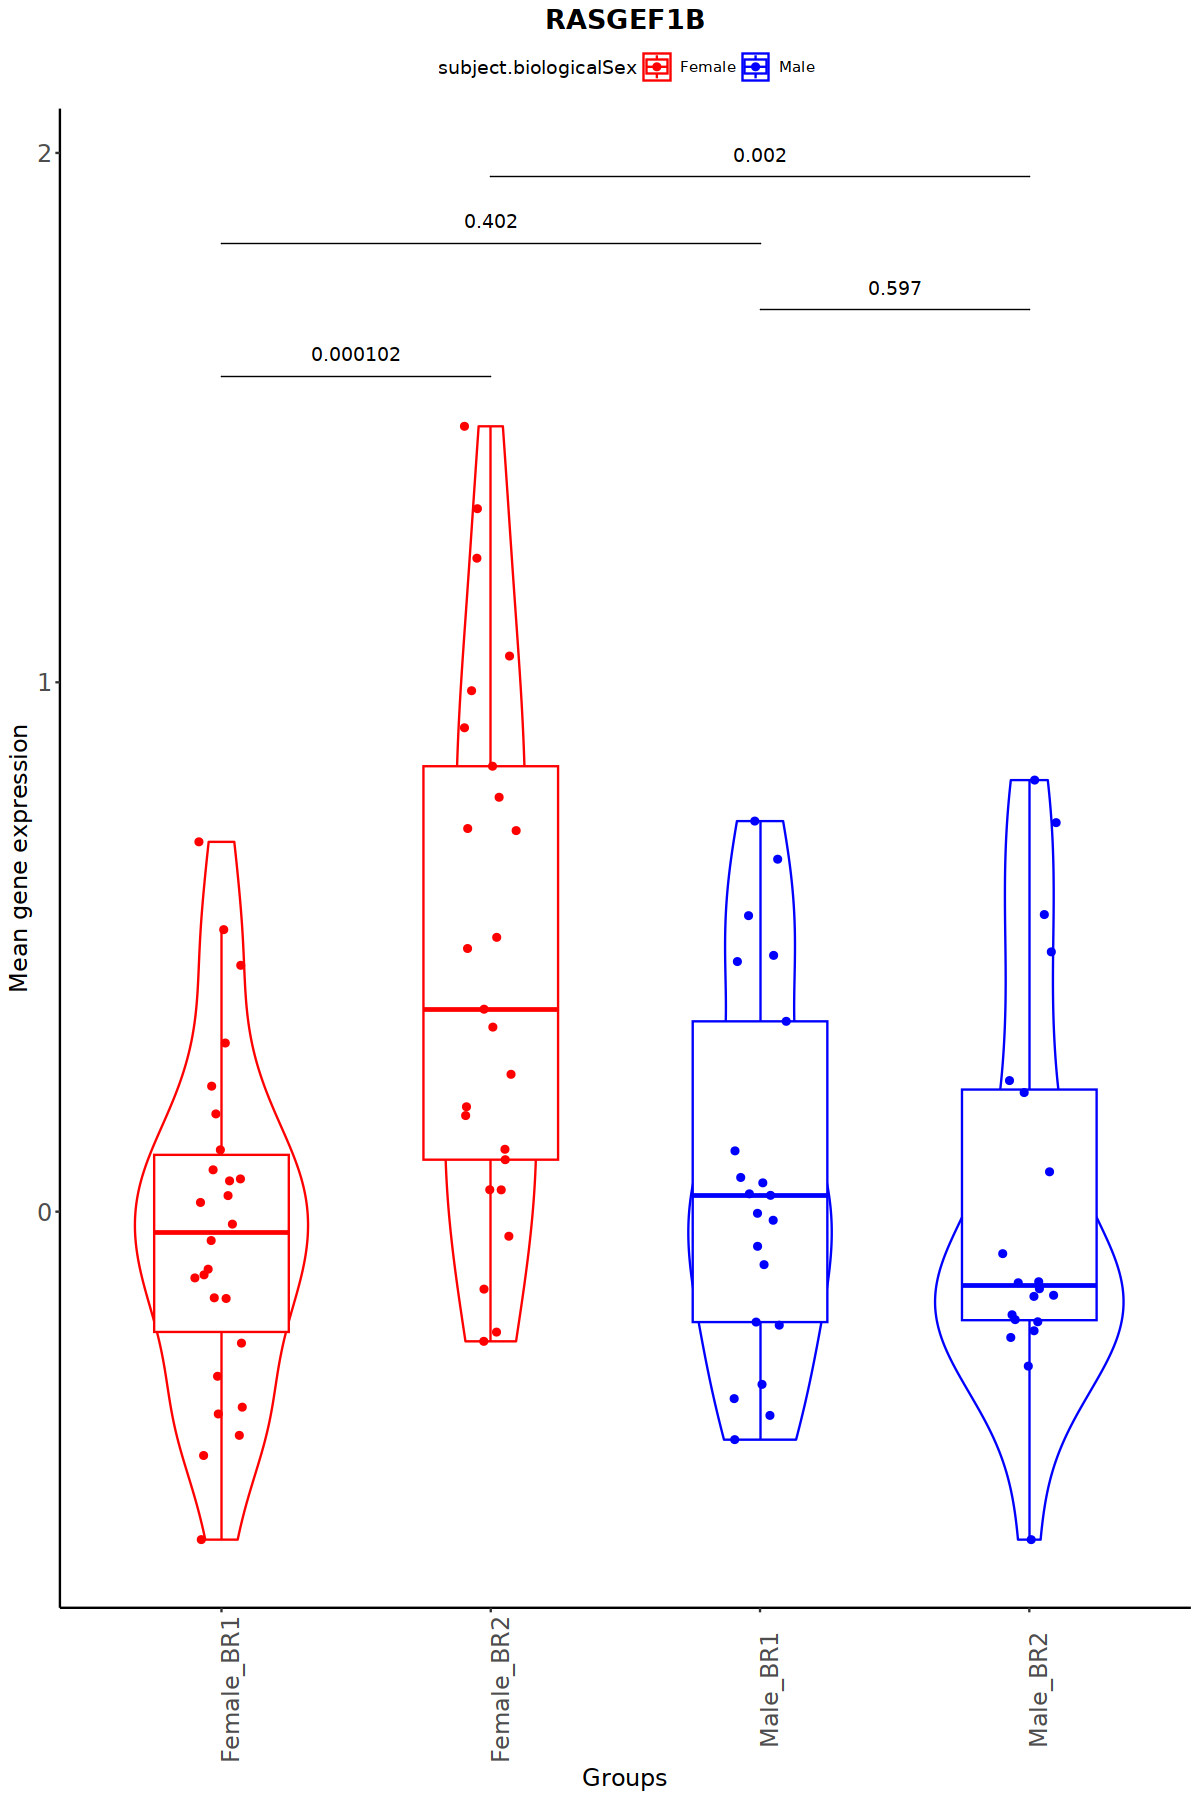

In [67]:
#list <- c('RBP7','FCGR3A','PTGS2','G0S2','NLRP3','IL1B','CCR1','BCL6','CXCL8','RASGEF1B','TNF','KLF6','NR4A1','BCL2A1','CCL4','CCL4L2','METRNL','NFKBID','LGALS2')

# Use y_var in the code
y_var <- "RASGEF1B"
gene <- y_var

my_comparisons <- list(c("Female_BR1", "Female_BR2"), c("Male_BR1", "Male_BR2"), c("Female_BR1", "Male_BR1"), c("Female_BR2", "Male_BR2") )

stat_test <- wilcox_test(as.formula(paste(y_var, "~ facet")), data = combined_df, comparisons = my_comparisons, paired = FALSE) %>% 
              adjust_pvalue(method = 'BH') %>% 
                add_xy_position(x = "facet", dodge = 0.8)



#outfile <- paste("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/Mean_gene_expression_IL1B+_CD14_mono/IL1B_CD14mono_mean_gene_exp_v1/IL1B_CD14mono_mean_gene_exp_v1_", cell, ".pdf", sep="")
options(repr.plot.width = 10, repr.plot.height = 15)
p3 <- ggplot(combined_df, aes(x = facet, y = !!sym(y_var), color = subject.biologicalSex)) +
  geom_violin(width = 0.7) +  # Adjust width as needed
  geom_boxplot(width = 0.5, outlier.shape = NA) +  # Nudge boxplots slightly for better visualization
  geom_jitter(width = 0.1) +
  ylab('Mean gene expression') + 
  xlab('Groups') +
  scale_color_manual(values = c( "red","blue")) +
  theme(axis.text.x = element_text(size = 14, angle = 90 ),     # Adjust font size of x-axis text
        axis.text.y = element_text(size = 14),     # Adjust font size of y-axis text
        axis.title = element_text(size = 14),
        panel.background = element_rect(fill = "white"),
        axis.line = element_line(color = "black"),  # Set axis line color to black,  # Set major grid line color to black
        panel.grid.minor = element_blank(),
        legend.position = "top",  # Set legend position to top
        #legend.title = element_blank()
       ) +
  stat_pvalue_manual(stat_test, label = "p", tip.length = 0) +
  #scale_y_continuous(expand = expansion(mult = c(0, 0.1))) + 
  ggtitle(gene) +
  theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))
  #pdf(file = outfile, width = 7, height = 11)
  print(p3)
  dev.off()

In [84]:
#Loop to create plots


# Define the list of genes
gene_list <- c('RBP7', 'FCGR3A', 'PTGS2', 'G0S2', 'NLRP3', 'IL1B', 'CCR1', 'BCL6', 'CXCL8', 'RASGEF1B', 'TNF', 'KLF6', 'NR4A1', 'BCL2A1', 'CCL4', 'CCL4L2', 'METRNL', 'NFKBID', 'LGALS2')

# comparisons
my_comparisons <- list(c("Female_BR1", "Female_BR2"), c("Male_BR1", "Male_BR2"), c("Female_BR1", "Male_BR1"), c("Female_BR2", "Male_BR2"))

# Iterate through the list of genes
for (gene in gene_list) {
  
    # Perform statistical test for the current gene
  stat_test <- wilcox_test(as.formula(paste(gene, "~ facet")), data = combined_df, comparisons = my_comparisons, paired = FALSE) %>% 
    adjust_pvalue(method = 'BH')%>% add_xy_position(x = "facet", dodge = 0.8)
   

  # Define the output file path
  outfile <- paste("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/Mean_gene_expression_IL1B+_CD14_mono/IL1B_CD14mono_mean_gene_exp_p_value_v2/IL1B_CD14mono_mean_gene_exp_p_value_plots_", gene, ".pdf", sep="")
  
  # Create the plot for the current gene
  p3 <- ggplot(combined_df, aes(x = facet, y = !!sym(gene), color = subject.biologicalSex)) +
    geom_violin(width = 0.7) +  # Adjust width as needed
    geom_boxplot(width = 0.5, outlier.shape = NA) +  # Nudge boxplots slightly for better visualization
    geom_jitter(width = 0.1) +
    ylab('Mean gene expression') + 
    xlab('Groups') +
    scale_color_manual(values = c("red", "blue")) +
    theme(axis.text.x = element_text(size = 14, angle = 90),     
          axis.text.y = element_text(size = 14),     
          axis.title = element_text(size = 14),
          panel.background = element_rect(fill = "white"),
          axis.line = element_line(color = "black"),
          panel.grid.minor = element_blank(),
          legend.position = "top",
          plot.title = element_text(hjust = 0.5, size = 16, face = "bold")
    ) +
    stat_pvalue_manual(stat_test, label = "p", tip.length = 0) +
    ggtitle(gene)
  
  # Save the plot to a PDF file
  pdf(file = outfile, width = 7, height = 11)
  print(p3)
  dev.off()
}


Warning message:
“`position_dodge()` requires non-overlapping x intervals”


null device 
          1

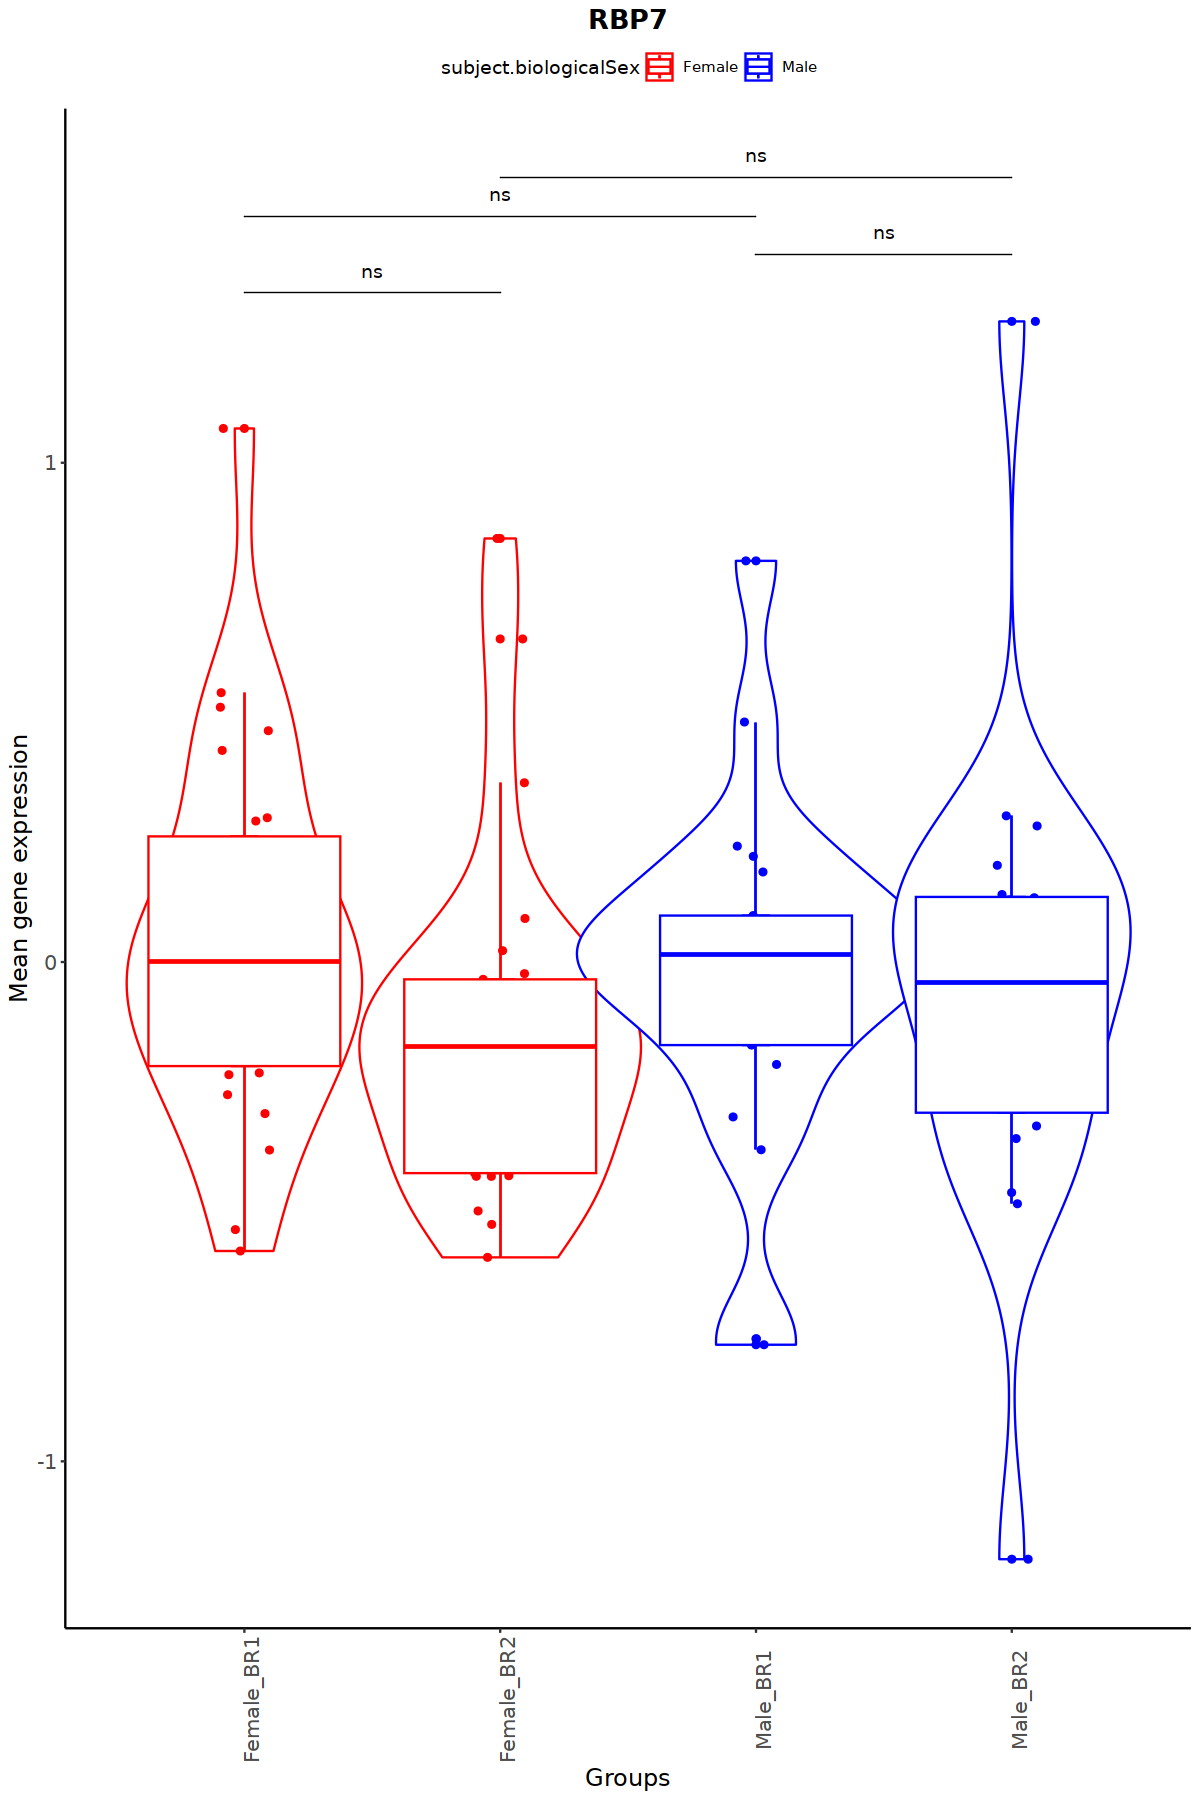

In [32]:
# # Use y_var in the code
# y_var <- "RBP7"
# gene <- y_var

# my_comparisons <- list(c("Female_BR1", "Female_BR2"), c("Male_BR1", "Male_BR2"), c("Female_BR1", "Male_BR1"), c("Female_BR2", "Male_BR2") )

# stat_test <- wilcox_test(as.formula(paste(y_var, "~ facet")), data = combined_df, comparisons = my_comparisons, paired = FALSE) %>% 
#               adjust_pvalue(method = 'BH') %>% add_xy_position(x = "facet", dodge = 0.8)

# #stat_test

# # p3 <- ggplot(combined_df, aes(x = facet, y = !!sym(y_var), color = subject.biologicalSex)) +
# #   geom_violin(width = 0.7) +  # Adjust width as needed
# #   geom_boxplot(width = 0.2, outlier.shape = NA, alpha = 0.2, position = position_nudge(x = 0.3)) +  # Nudge boxplots slightly for better visualization
# #   geom_jitter(width = 0.1)

# options(repr.plot.width = 10, repr.plot.height = 15)
# p3 <- ggplot(combined_df, aes(x = facet, y = !!sym(y_var), color = subject.biologicalSex  )) +
#   geom_violin(width=1.4)+
#   geom_boxplot(width = 0.1, outlier.shape = NA,  alpha=0.2) +
#   geom_jitter(width =0.1) +
#   ylab('Mean gene expression') + 
#   xlab('Groups') +
#   scale_color_manual(values = c( "red","blue")) +
#   theme(axis.text.x = element_text(size = 12, angle = 90 ),     # Adjust font size of x-axis text
#         axis.text.y = element_text(size = 12),     # Adjust font size of y-axis text
#         axis.title = element_text(size = 14),
#         panel.background = element_rect(fill = "white"),
#         axis.line = element_line(color = "black"),  # Set axis line color to black,  # Set major grid line color to black
#         panel.grid.minor = element_blank(),
#         legend.position = "top",  # Set legend position to top
#         #legend.title = element_blank()
#        ) +
#   geom_boxplot(position = position_dodge(width = 1))+
#   stat_pvalue_manual(stat_test, label = "p.adj.signif", tip.length = 0) +
#   #scale_y_continuous(expand = expansion(mult = c(0, 0.1))) + 
#   ggtitle(gene) +
#   theme(plot.title = element_text(hjust = 0.5, size = 16, face = "bold"))
#   #pdf(file = outfile, width = 7, height = 11)
#   print(p3)
#   dev.off()

# STAT test output

In [85]:
# Define the list of genes
gene_list <- c('RBP7', 'FCGR3A', 'PTGS2', 'G0S2', 'NLRP3', 'IL1B', 'CCR1', 'BCL6', 'CXCL8', 'RASGEF1B', 'TNF', 'KLF6', 'NR4A1', 'BCL2A1', 'CCL4', 'CCL4L2', 'METRNL', 'NFKBID', 'LGALS2')

# comparisons
my_comparisons <- list(c("Female_BR1", "Female_BR2"), c("Male_BR1", "Male_BR2"), c("Female_BR1", "Male_BR1"), c("Female_BR2", "Male_BR2"))


for (gene in gene_list) {
  # Perform statistical test for the current gene
  stat_test <- wilcox_test(as.formula(paste(gene, "~ facet")), data = combined_df, comparisons = my_comparisons, paired = FALSE) %>% 
    adjust_pvalue(method = 'BH')
  
  # Extract the data frame from the stat_test list
  #stat_df <- data.frame(stat_test[[9]])
  
  # Define the output file path for the CSV
  outfile_csv <- paste("/home/jupyter/IH-A-Aging-Analysis-Notebooks_old/Mansi_Notebooks/scRNA/DEG_Analysis/MS_Sex_DEG_analysis/Mean_gene_expression_IL1B+_CD14_mono/IL1B_CD14mono_mean_gene_exp_p_value_v2/IL1B_CD14mono_mean_gene_exp_p_value_CSV_", gene, ".csv", sep="")
  
  # Write the data frame to a CSV file
  write.csv(stat_test, outfile_csv, row.names = FALSE)
}